In [52]:
import u3
import time
import numpy as np
import matplotlib.pyplot as plt
import pickle

class robot:
    def __init__(self):
        self.labjack = u3.U3()
        
        self.bxycal = 1. /230 #these are used to convert 
        self.bzcal = 1./ 205  #for some reason LSM303 has different gain in z
        
    def close(self):
        self.labjack.close()

       
    def takeBfieldPoint(self):
        #SCL should be FI07
        #SDA should be FI06
        #pullup resistors needed
        mylj = self.labjack
        mylj.debug = False
        mylj.configIO(FIOAnalog=0,EIOAnalog=0)
        #mylj.setFIOState(4,0)
        #t = mylj.configIO(EnableCounter0 = True,TimerCounterPinOffset = 4)

        LSM303_ADDRESS_MAG   = (0x3C >> 1)  # 0011110x
        LSM303_REGISTER_CRB_REG_M         = 0x01   #to set gain. should be set to 11100000 = 0xE0
        LSM303_REGISTER_MAG_MR_REG_M      = 0x02
        LSM303_REGISTER_MAG_OUT_X_H_M     = 0x03
        response = mylj.i2c(LSM303_ADDRESS_MAG,[LSM303_REGISTER_MAG_MR_REG_M,0x00])
        response = mylj.i2c(LSM303_ADDRESS_MAG,[LSM303_REGISTER_CRB_REG_M,0xE0])
        
        
        response = mylj.i2c(LSM303_ADDRESS_MAG,[LSM303_REGISTER_MAG_OUT_X_H_M], NumI2CBytesToReceive = 6)
        # print(response['I2CBytes'])
        reply = response['I2CBytes'];

        Bx = mag16(reply[0],reply[1])*self.bxycal
        By = mag16(reply[2],reply[3])*self.bxycal
        Bz = mag16(reply[4],reply[5])*self.bzcal
        
        #print(reply)         
        #print(Bx)
        return (Bx,By,Bz)
    
    def printAnalogIns(self):
        AIN0value = self.labjack.getAIN(0)
        AIN1value = self.labjack.getAIN(1)
        AIN2value = self.labjack.getAIN(2)
        AIN3value = self.labjack.getAIN(3)
        descriptor ='A0 = %5.3f volts, A1 = %5.3f volts, A2 = %5.3f volts, A3 = %5.3f volts ' % (AIN0value, AIN1value, AIN2value, AIN3value)
        print(descriptor)
  
  
         
    
def mag16(hibyte,lobyte):
    #a utility to convert LM303 bytes into usable numbers
    
    n = (hibyte << 8) | lobyte
    if n > 32767: 
        n -= 65536
    return n    

def plotBFields():
    myRobot = robot()
    allBx = []
    allBy = []
    allBz = []
    allTimes = []
    plt.ion()
    startTime = time.time()
    for i in range(100):
        (Bx,By,Bz) = myRobot.takeBfieldPoint()
        allTimes.append(time.time() - startTime) #record the current time
        
        
        allBx.append(Bx)
        allBy.append(By)
        allBz.append(Bz)
        time.sleep(0.1)
        
    tName = input('input the trial name (M-L-A-n): ')
    aData=open(tName,'wb')
    pickle.dump([allTimes, allBx, allBy, allBz],aData)
    aData.close()
        
    plt.figure()
    plt.plot(allTimes,allBx,label = 'Bx')
    plt.plot(allTimes,allBy,label = 'By')
    plt.plot(allTimes,allBz,label = 'Bz')
    plt.xlabel('time, seconds')
    plt.ylabel('field, Gauss')
    plt.draw()
    plt.gca().legend()
        
    myRobot.close()
        

   

input the trial name (M-L-A-n):  80-50-6-5


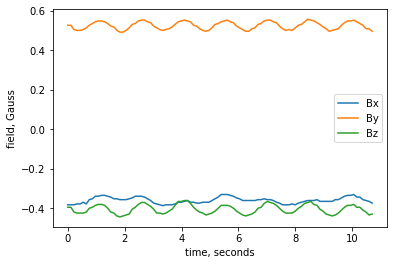

In [111]:
#r01=robot()    
#r01.printAnalogIns()
plotBFields()

In [63]:
#aData=open(dataFiles[trials],'rb')
#xData, yData = pickle.load(aData)
#aData.close()

In [6]:
0x03

3